<br><br>
<b><span style='font-size: 20px'>Table of contents:</span></b>
* [<span style='font-size: 18px'>Introduction</span>](#intro)
* [<span style='font-size: 18px'>Imports and data extraction</span>](#imports)
* [<span style='font-size: 18px'>Data preprocessing</span>](#preprocessing)
* [<span style='font-size: 18px'>Exploratory data analysis</span>](#eda)
 * [<span style='font-size: 18px'>Suggestion 1</span>](#sug1)
 * [<span style='font-size: 18px'>Suggestion 2</span>](#sug2)
 * [<span style='font-size: 18px'>Suggestion 3</span>](#sug3)
* [<span style='font-size: 18px'>Conclusion</span>](#conclusion)
    

# <b>Introduction</b> <a class="anchor"  id="intro"></a>

<div style='font-size: 16px'>
    <b style='font-size: 18px'>Greetings!</b><br> This notebook uses data from <a href='https://www.kaggle.com/datasets/matthieugimbert/french-bakery-daily-sales'>"French bakery daily sales" dataset</a>.
    <br>It contains:
    <li>data preprocessing</li>
    <li>exploratory data analysis (EDA)</li>
    <li>some assumptions on what approaches can improve business indicators.</li>
    <br>Also, I put <a href='https://github.com/tim-akh/French-Bakery-Sales-Analysis/blob/main/Superset%20Dashboard/french-bakery-sales-superset-dashboard.jpg'>a link</a> to a dashboard, which was build using data, preprocessed in this notebook.
    <br>So, now we start!
</div>

<div align='center' style='font-size: 48px'>
    <b>French Bakery Daily Sales Data Analysis</b>
    <img src='https://upload.wikimedia.org/wikipedia/commons/6/66/Typical_French_bakery_pastries.jpg' style='padding: 30px;  border-radius: 50px' width=700px />


# <b>Imports and data extraction</b> <a class="anchor"  id="imports"></a>

In [1]:
import numpy as np
import pandas as pd

from collections import Counter
import statistics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import warnings

In [2]:
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/french-bakery-daily-sales/Bakery sales.csv')
data

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"
...,...,...,...,...,...,...,...
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €"
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €"
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €"
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


# <b>Data preprocessing</b> <a class="anchor"  id="preprocessing"></a>

In [5]:
data.isna().sum()

Unnamed: 0       0
date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
dtype: int64

<div style='font-size: 16px'>
    We can see, that there are no NaNs in the dataset. Actually, a deeper analysis showed that there are no default values that were used to fill missings. <br>The dataset should be convenient to work with.
</div>

In [6]:
def data_preprocessing(data):
    # Unnamed: 0 columns does not provide us with useful info, so we drop it 
    data = data.drop('Unnamed: 0', axis=1)
    
    # it is worth to bring column names snake_case style
    data = data.rename(columns={
        'Quantity': 'quantity',
        'unit_price': 'unit_price (eur)'
    })
    
    # unit_price column contains EUR sign in it's values and a floating point is somehow a floating comma
    # we should fix that
    data['unit_price (eur)'] = data['unit_price (eur)'].str.split(expand=True)[0]
    data['unit_price (eur)'] = data['unit_price (eur)'].str.replace(',','.')
    data = data[data['unit_price (eur)'] != 0]
    
    # for further analysis we should create datetime column using date and time columns that already exist
    # we leave date column and drop time, since it will be excess
    data['date_time'] = data['date'] + ' ' + data['time']
    data = data.drop(['time'], axis=1)
    
    # to make analysis easier we convert column types to appropriate ones
    data = data.astype({
        'date_time': 'datetime64[ns]',
        'date': 'datetime64[ns]',
        'ticket_number': 'int',
        'unit_price (eur)': 'float',
        'quantity': 'int'
    })
    
    # total cost column is easy to calculate and it will be helpful in the dataset analysis    
    data['total_cost (eur)'] = data['quantity'] * data['unit_price (eur)']
    
    #data.to_csv('bakery_data_preprocessed.csv')   
    
    return data
        
data = data_preprocessing(data)

# <b>Exploratory data analysis</b> <a class="anchor"  id="eda"></a>

In [7]:
data

,date,ticket_number,article,quantity,unit_price (eur),date_time,total_cost (eur)
0,2021-01-02,150040,BAGUETTE,1,0.90,2021-01-02 08:38:00,0.90
1,2021-01-02,150040,PAIN AU CHOCOLAT,3,1.20,2021-01-02 08:38:00,3.60
2,2021-01-02,150041,PAIN AU CHOCOLAT,2,1.20,2021-01-02 09:14:00,2.40
3,2021-01-02,150041,PAIN,1,1.15,2021-01-02 09:14:00,1.15
4,2021-01-02,150042,TRADITIONAL BAGUETTE,5,1.20,2021-01-02 09:25:00,6.00
...,...,...,...,...,...,...,...
234000,2022-09-30,288911,COUPE,1,0.15,2022-09-30 18:52:00,0.15
234001,2022-09-30,288911,BOULE 200G,1,1.20,2022-09-30 18:52:00,1.20
234002,2022-09-30,288911,COUPE,2,0.15,2022-09-30 18:52:00,0.30
234003,2022-09-30,288912,TRADITIONAL BAGUETTE,1,1.30,2022-09-30 18:55:00,1.30


<div style='font-size: 16px'>
    We will work with a dataframe that contains ~234k rows and 7 columns with information about order dates, order tickets, purchased products with their quantities, unit prices and total costs in euro.
</div>

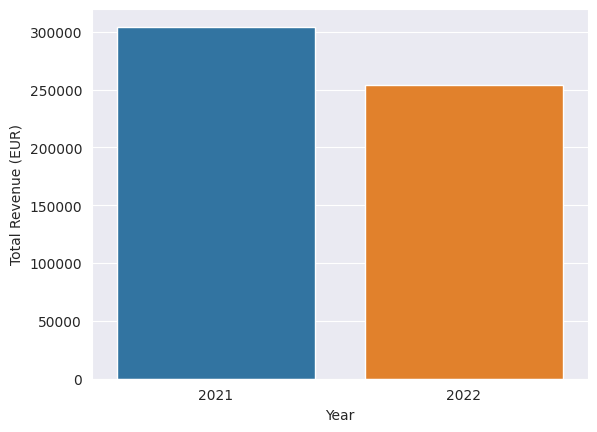

In [8]:
data['year'] = data['date'].dt.year

revenue_by_year = data.groupby('year')['total_cost (eur)'].agg('sum')
fig = sns.barplot(x=revenue_by_year.index, y=revenue_by_year)
fig.set(xlabel='Year', ylabel='Total Revenue (EUR)');

<div style='font-size: 16px'>
    The dataset contains information about bakery daily sales only for two years.
    <br>We can see that in 2021 total revenue in euro was 50k higher than in 2022, but we do not have information about sales in October 2022 and beyond.
</div>

<div style='font-size: 16px'>
    First of all, lets examine what are mean and median order values throughout all dataset.
</div>

In [9]:
print("Mean order value:", data.groupby('ticket_number')['total_cost (eur)'].agg('sum').mean())
print("Median order value:", data.groupby('ticket_number')['total_cost (eur)'].agg('sum').median())

Mean order value: 4.094076628240174
Median order value: 2.5


<div style='font-size: 16px'>
    Now let's look at a plot showing how much money they bakery made each day.
</div>

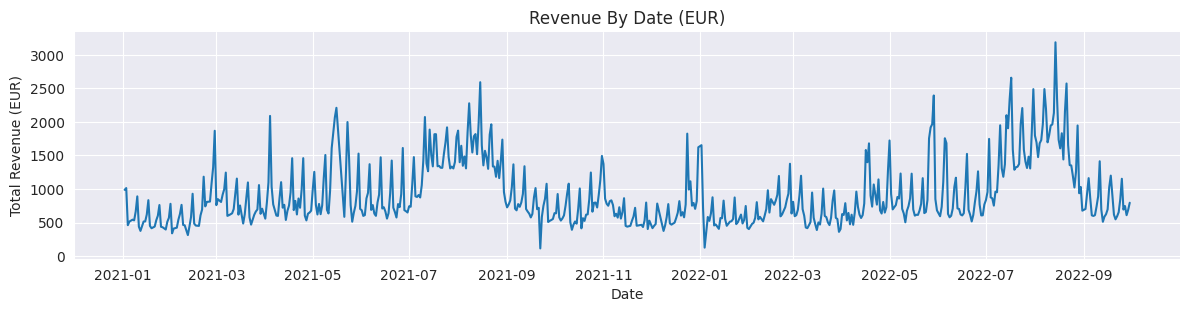

In [10]:
revenue_by_day = data.groupby('date')['total_cost (eur)'].agg('sum')
fig = sns.relplot(x=revenue_by_day.index, y=revenue_by_day, kind='line', height=3, aspect=4)
fig.set(title='Revenue By Date (EUR)', xlabel='Date', ylabel='Total Revenue (EUR)');

<div style='font-size: 16px'>
    Nice, we see a seasonality pattern that shows that sales are significantly higher in July and August.
    <br>Perhaps the bakery has a good location and the increase in sales is due to the influx of tourists in the summer.
    <br><br>Let's look at how much revenue the makery made by month.
</div>

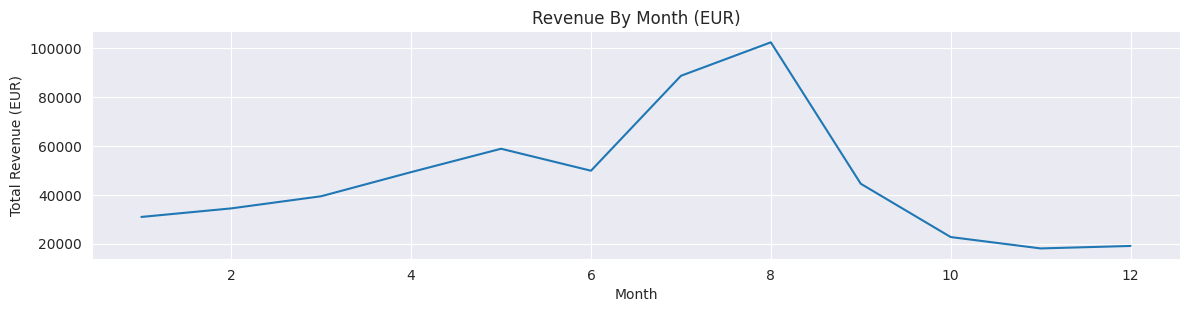

In [11]:
data['month'] = data['date'].dt.month

revenue_by_month = data.groupby('month')['total_cost (eur)'].agg('sum')
fig = sns.relplot(x=revenue_by_month.index, y=revenue_by_month, kind='line', height=3, aspect=4)
fig.set(title='Revenue By Month (EUR)', xlabel='Month', ylabel='Total Revenue (EUR)');

<div style='font-size: 16px'>
    We can see that revenue starts growing after January and the steepest growth is in July and the steepest fall in September, after September revenue gets lower and lower.
    <br>So we see almost the same seasonal pattern, but we have to not forget that all months, except October, November, and December, are contained in the dataset. No wonder total revenue is that low in the end of the plot.
    <br><br>Let's look at how much revenue the makery made by month only in 2021 to compare the plots.
</div>

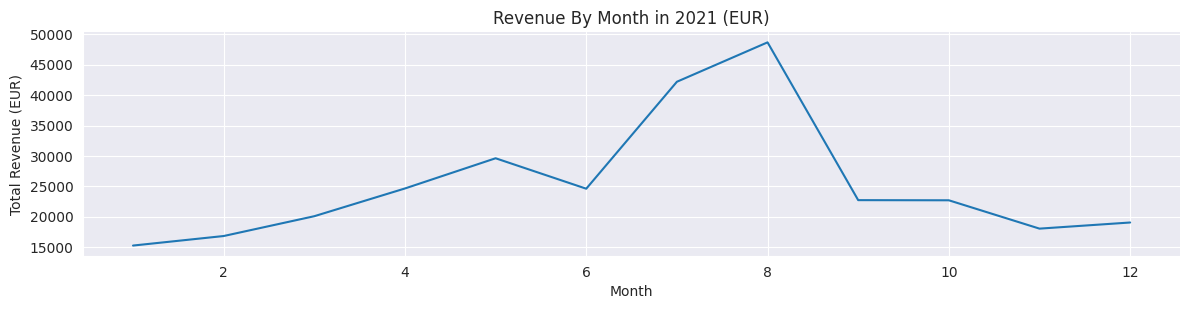

In [12]:
revenue_by_month_2021 = data[data['year'] == 2021].groupby('month')['total_cost (eur)'].agg('sum')
fig = sns.relplot(x=revenue_by_month_2021.index, y=revenue_by_month_2021, kind='line', height=3, aspect=4)
fig.set(title='Revenue By Month in 2021 (EUR)', xlabel='Month', ylabel='Total Revenue (EUR)');

<div style='font-size: 16px'>
    The line plots look almost the same, so we can use the whole data, when we need to look at certain patterns.
    <br><br>Next, let's see what products brought the most revenue.
</div>

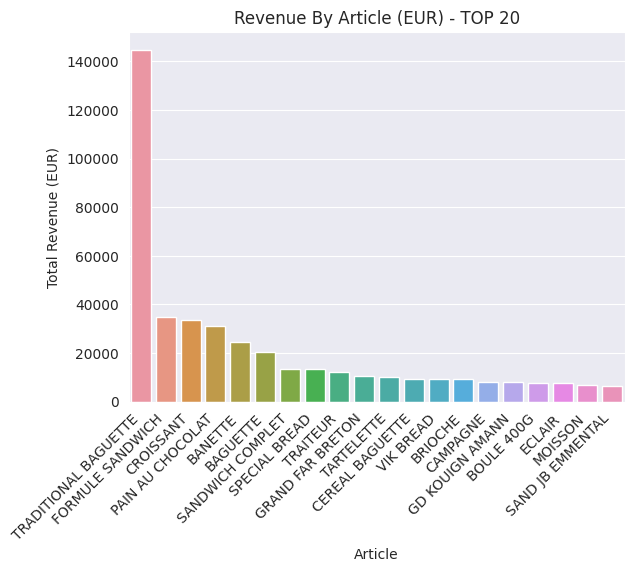

In [13]:
revenue_by_article = data.groupby('article')['total_cost (eur)'].agg('sum').sort_values(ascending=False)[:20]
fig = sns.barplot(x=revenue_by_article.index, y=revenue_by_article)
fig.set(title='Revenue By Article (EUR) - TOP 20', xlabel='Article', ylabel='Total Revenue (EUR)')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

<div style='font-size: 16px'>
    Traditional baguette is the most crucial product for the bakery. We can see how much more revenue it brings than the others. Actually, it is very useful to know, since we will be able to use this article in some discount manupulations to increase sales.
    <br><br>Let's try to find out, why traditional baguette is that popular (besides the fact that it is very delicious).
</div>

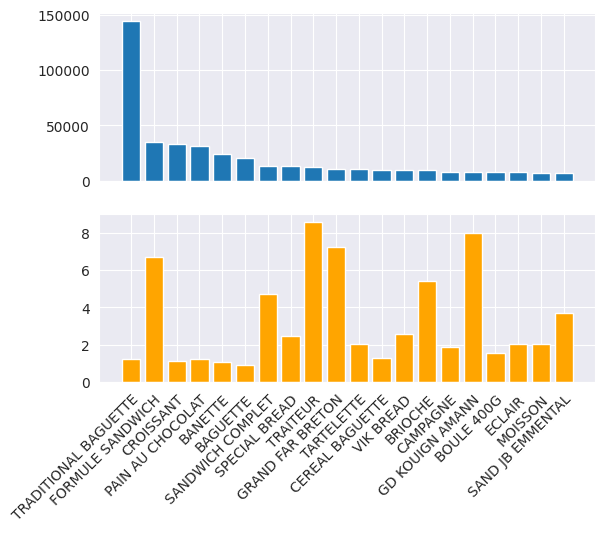

In [14]:
prices_for_top20_articles = []
for article in revenue_by_article.index:
    prices_for_top20_articles.append(data[data['article'] == article]['unit_price (eur)'].mean())

fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].bar(x=revenue_by_article.index, height=revenue_by_article)
ax[1].bar(x=revenue_by_article.index, height=prices_for_top20_articles, color='orange')
plt.xticks(revenue_by_article.index, rotation=45, ha='right', rotation_mode='anchor')
plt.show()

<div style='font-size: 16px'>
    The graphs above show us how much revenue each of the most significant products brought and what was their mean price.
    <br>We can see that 5 out of 6 most profitable products had relatively low mean price. It is crucial to mention, that traditional baguette has a relatively low price.
    <br>Majority of most profitable products have a low price, and they are profitable because clients buy them a lot.
    <br><br>Supposedly, it would be useful to know what products which products are bought together most often.
</div>

In [15]:
sales_data = data[data['ticket_number'].duplicated(keep=False)]
sales_data['grouped'] = sales_data.groupby('ticket_number')['article'].transform(lambda x: ', '.join(x.sort_values()))

c = Counter(sales_data['grouped'])
c.most_common(20)

[('CROISSANT, PAIN AU CHOCOLAT, TRADITIONAL BAGUETTE', 3621),
 ('CROISSANT, TRADITIONAL BAGUETTE', 3280),
 ('COUPE, SPECIAL BREAD', 2396),
 ('CAMPAGNE, COUPE', 2360),
 ('BAGUETTE, TRADITIONAL BAGUETTE', 2354),
 ('BOULE 400G, COUPE', 2274),
 ('PAIN AU CHOCOLAT, TRADITIONAL BAGUETTE', 2024),
 ('COUPE, TRADITIONAL BAGUETTE, VIK BREAD', 1971),
 ('CROISSANT, PAIN AU CHOCOLAT', 1956),
 ('BOULE 200G, COUPE', 1750),
 ('COMPLET, COUPE, TRADITIONAL BAGUETTE', 1596),
 ('BOULE 400G, COUPE, TRADITIONAL BAGUETTE', 1437),
 ('BANETTE, TRADITIONAL BAGUETTE', 1436),
 ('CAMPAGNE, COUPE, TRADITIONAL BAGUETTE', 1416),
 ('COUPE, SPECIAL BREAD, TRADITIONAL BAGUETTE', 1347),
 ('COUPE, MOISSON, TRADITIONAL BAGUETTE', 1326),
 ('COMPLET, COUPE', 1310),
 ('COUPE, MOISSON', 1184),
 ('BAGUETTE, BANETTE', 1118),
 ('COUPE, SEIGLE, TRADITIONAL BAGUETTE', 1110)]

<div style='font-size: 16px'>
    No wonder we see traditional baguette in a lot of common combinations. Also, people buy many products with croissants, and they are popular and pretty cheap too.
    <br><br>
</div>

<div style='font-size: 16px'>
    Actually, it is possible to use that demand on traditional baguettes and croissants to introduce clients products that are high quality but not popular, so:
</div>

## Suggestion 1 <a class="anchor"  id="sug1"></a>

<div style='border: 3px solid chocolate; margin: 30px; border-radius: 5px; padding: 15px; font-size: 16px'>
        <span>It can be profitable to make promotions on some lucky hours when you can buy traditional baguette, croissant, and some unpopular product together with a good discount, because it is possible that people do not buy some amazing products just because they have never tried them.</span>
</div>

<div style='font-size: 16px'>
    We can see some example of that unpopular products below. Clients buy them, but it is not a very common occurrence. Maybe we can fix it.
</div>

In [16]:
quantity_by_article = data.groupby('article')['quantity'].agg('sum').sort_values()
quantity_by_article[quantity_by_article > 20][:10]

article
PAIN SUISSE PEPITO        21
ECLAIR FRAISE PISTACHE    22
GAL POIRE CHOCO 4P        24
TROPEZIENNE FRAMBOISE     33
NID DE POULE              35
ENTREMETS                 38
PAIN DE MIE               40
BROWNIES                  45
TARTELETTE CHOC           60
DELICETROPICAL            61
Name: quantity, dtype: int64

<div style='font-size: 16px'>
    Also, it is worth to examine how much revenue the bakery receives by hours.
</div>

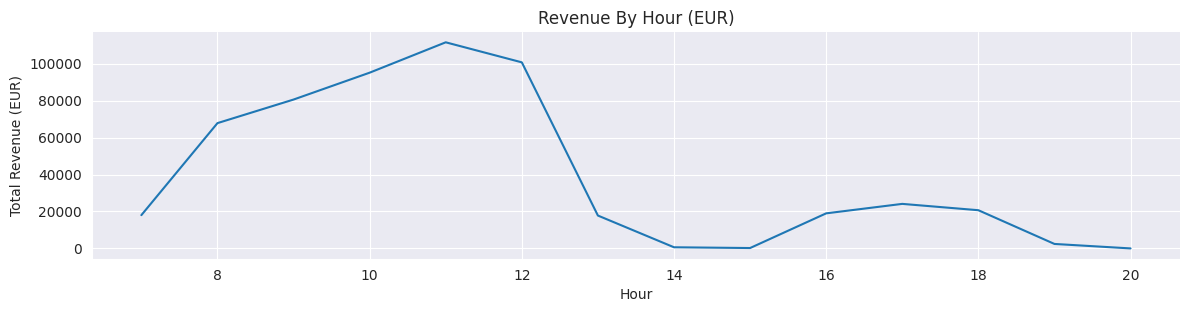

In [17]:
data['hour'] = data['date_time'].dt.hour
revenue_by_hour = data.groupby('hour')['total_cost (eur)'].agg('sum')

fig = sns.relplot(x=revenue_by_hour.index, y=revenue_by_hour, kind='line', height=3, aspect=4)
fig.set(title='Revenue By Hour (EUR)', xlabel='Hour', ylabel='Total Revenue (EUR)');

<div style='font-size: 16px'>
    We can see that the bakery gets most revenue in the morning (8 a.m.-12. p.m.), after that there is a severe decline, and then there is a small increase between 4 p.m. and 6 p.m.
    <br>Maybe that is because the baked goods are the freshest in the morning, and also people buy them before work. A small increase at 4 p. m. may be because people finish working and then they visit the bakery.
    <br> I think we should try to do something with these downturns in demand.
    <br> First of all, the bakery should reduce prices when demand is low, but it is a common practice, so let's see if the bakery does it.
</div>

<div style='font-size: 16px'>
    But before that I would like to see how the bakery revenue from traditional baguette (most crucial product as we remember) changes hour by hour.
</div>

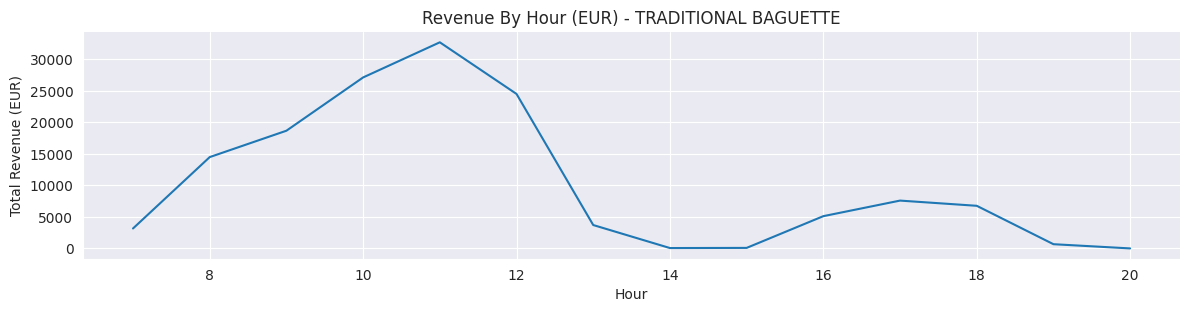

In [18]:
revenue_by_hour_baguette = data[data['article'] == 'TRADITIONAL BAGUETTE'].groupby('hour')['total_cost (eur)'].agg('sum')

fig = sns.relplot(x=revenue_by_hour_baguette.index, y=revenue_by_hour_baguette, kind='line', height=3, aspect=4)
fig.set(title='Revenue By Hour (EUR) - TRADITIONAL BAGUETTE', xlabel='Hour', ylabel='Total Revenue (EUR)');

<div style='font-size: 16px'>
    Actually, it shows almost the same pattern as the plot for all products.
    <br>Now let's look if the bakery changes its price throught a day.
</div>

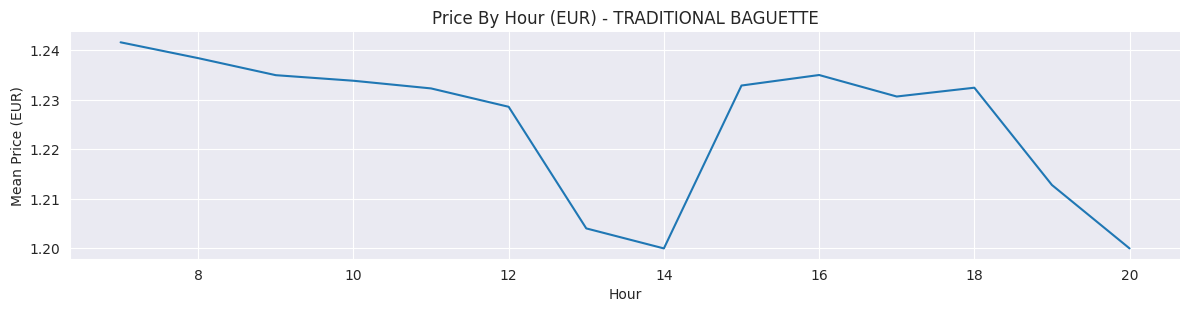

In [19]:
price_by_hour_baguette = data[data['article'] == 'TRADITIONAL BAGUETTE'].groupby('hour')['unit_price (eur)'].agg('mean')

fig = sns.relplot(x=price_by_hour_baguette.index, y=price_by_hour_baguette, kind='line', height=3, aspect=4)
fig.set(title='Price By Hour (EUR) - TRADITIONAL BAGUETTE', xlabel='Hour', ylabel='Mean Price (EUR)');

<div style='font-size: 16px'>
    So, the bakery lowers the price of traditional baguette when the demand is low, and we can see that it does not really help. Let's see how price changes for two other profitable products.
</div>

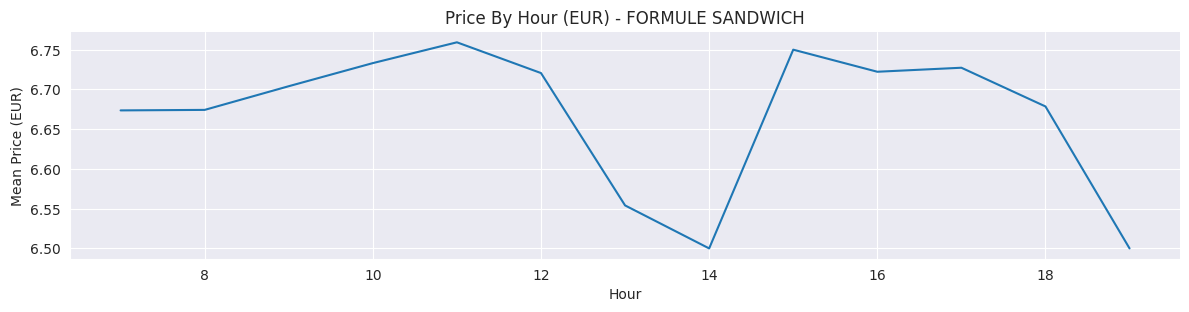

In [20]:
price_by_hour_sandwich = data[data['article'] == 'FORMULE SANDWICH'].groupby('hour')['unit_price (eur)'].agg('mean')

fig = sns.relplot(x=price_by_hour_sandwich.index, y=price_by_hour_sandwich, kind='line', height=3, aspect=4)
fig.set(title='Price By Hour (EUR) - FORMULE SANDWICH', xlabel='Hour', ylabel='Mean Price (EUR)');

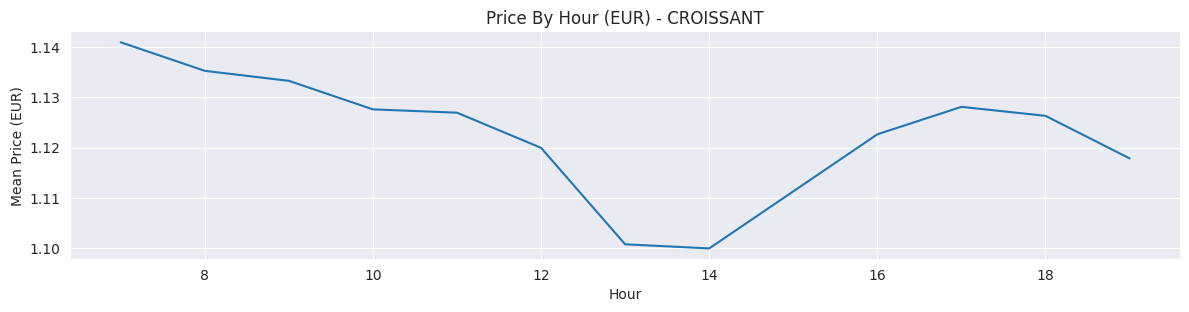

In [21]:
price_by_hour_croissant = data[data['article'] == 'CROISSANT'].groupby('hour')['unit_price (eur)'].agg('mean')

fig = sns.relplot(x=price_by_hour_croissant.index, y=price_by_hour_croissant, kind='line', height=3, aspect=4)
fig.set(title='Price By Hour (EUR) - CROISSANT', xlabel='Hour', ylabel='Mean Price (EUR)');

<div style='font-size: 16px'>
    They show almost the same pattern.
    <br>We may assume that at 1 p.m. and 2 p.m. people have a lunch in other places or it is not convenient for them do visit the bakery because of work, for example. So:
    
</div>

## Suggestion 2 <a class="anchor"  id="sug2"></a>

<div style='border: 3px solid chocolate; margin: 30px; border-radius: 5px; padding: 15px; font-size: 16px'>
        <span>It may be reasonable to collaborate with a respectable food delivery organization to let people buy and receive their goods in that hour when demand is low.</span>
</div>

<div style='font-size: 16px'>
    Of course, there are many factors that need to be taken into account when implementing this, but it would be amazing if it solves the problem.
    
</div>

<div style='font-size: 16px'>
    I think it would be helpful to know what products people buy at certian hours. Let's build a heatmap of products quantities by hours.
    
</div>

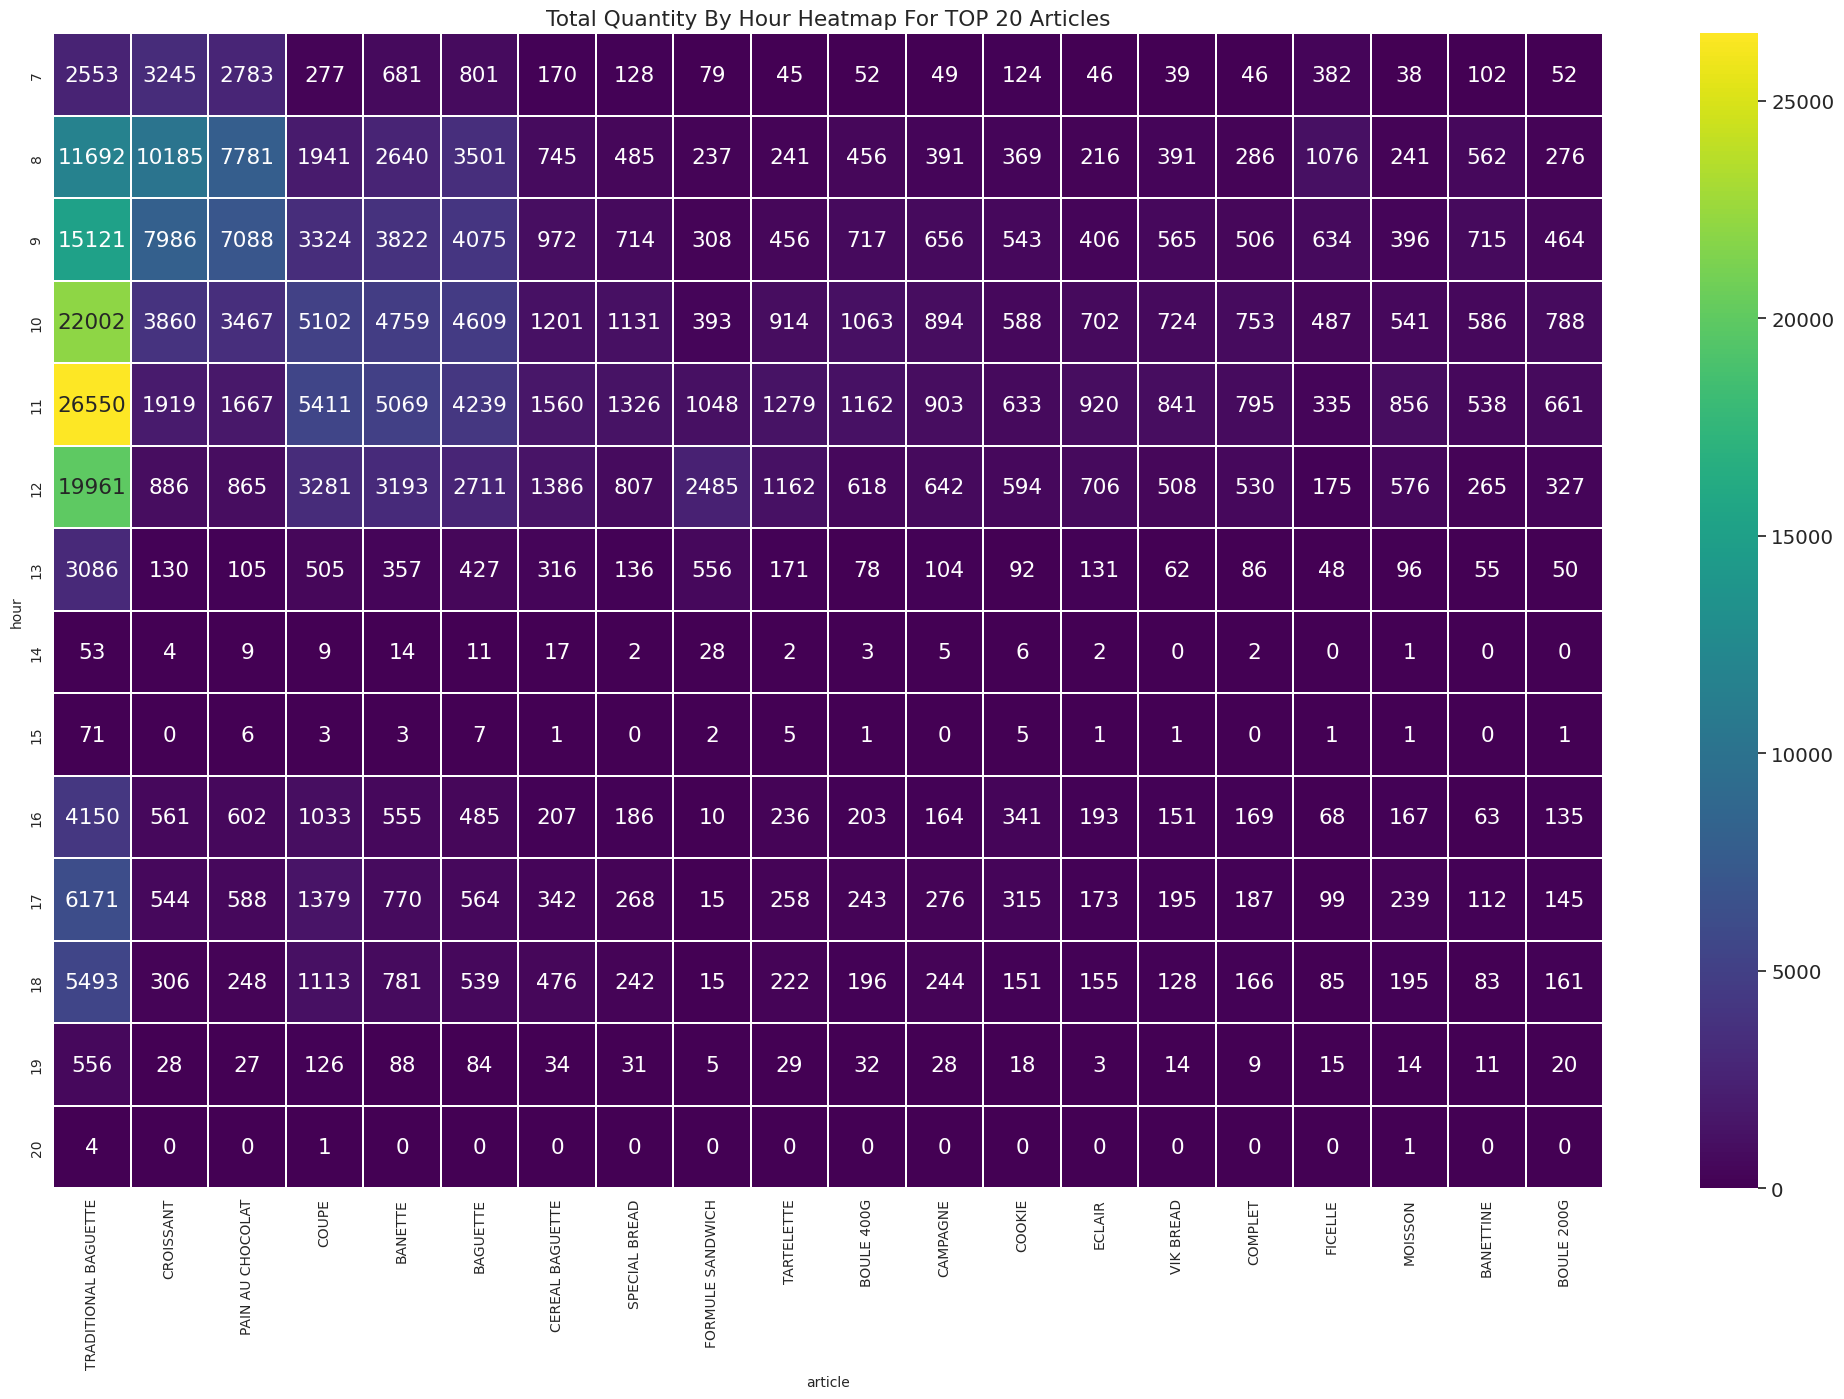

In [22]:
quantity_by_article_top20 = data.groupby('article')['quantity'].agg('sum').sort_values(ascending=False)[:20]

articles_quantity_by_hour = pd.pivot_table(data, values='quantity', index='hour', columns='article', aggfunc='sum')
articles_quantity_by_hour = articles_quantity_by_hour[list(quantity_by_article_top20.index)].fillna(0)

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.3)
sns.heatmap(articles_quantity_by_hour, annot=True, cmap='viridis', fmt='.0f', linewidths=.1, ax=ax)
ax.set(title='Total Quantity By Hour Heatmap For TOP 20 Articles');

<div style='font-size: 16px'>
    I do not think that we can get any insights from the heatmap above, since we saw what we already know. We can just assume that maybe the time between 10 a.m. and 12 p.m. is the best to sell some unpopular products together with traditional baguettes with a good discount. We are referencing to suggestion 1 now.
    
</div>



<div style='font-size: 16px'>
    The dataset has no features that can help us to identify a certain client. I think it is worth to do the following:
    
</div>

## Suggestion 3 <a class="anchor"  id="sug3"></a>

<div style='border: 3px solid chocolate; margin: 30px; border-radius: 5px; padding: 15px; font-size: 16px'>
        <span>The bakery should create their loyalty cards with a minor discount. First of all, it will let them to be aware of what certain clients prefer, and this can help with creating some personal offers for loyal clients. This innovation should have a good impact on customer retention. </span>
</div>
<div style='font-size: 16px'>
    Also, it will allow the bakery to perform data analysis, for example, calculate metrics like DAU, WAU, MAU, keep track of retention.
</div>

# <b>Conclusion</b> <a class="anchor"  id="conclusion"></a>

<div style='font-size: 16px'>
    It has to be mentioned that I do not have enough information about the bakery to make accurate assumptions, but I tried my best while doing the analysis of the data I have.
    <br>I have performed data preprocessing, exploratory data analysis, and made some suggestions on what could make the business more modern and profitable.
    <br>If you somehow found this notebook and you can say that something is inaccurate or mistaken, feel free to share in a way that is comfortable for you. Also, I would love to get some advices from senior fellows.
    <br>Thanks a lot for your attention! Have a nice one! :)
</div>